In [1]:

from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os

## astropy
import astropy.units as u
from astropy.table import Table

## calin
from cta.nectarcam.feb.I_NmcConfig import NmcConfig

## ctapipe
from ctapipe_io_nectarcam import NectarCAMEventSource 
from ctapipe.io import event_source, EventSeeker

import scipy.stats as scsp
from scipy.stats import poisson                                                                                                             

from fit_ses_v6 import *
#import seaborn as sns



/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
npix = 10
nloop = 30
ress_MC    = []
ress_data  = []
gains_MC   = []
gains_data = []

sim_gains   = []

#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_08pe_newWF.simtel.gz'
#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_08pe_WF1010_noise36_TTled.simtel.gz'
#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_06pe_WF1010_noise36_TTled_40k.simtel.gz'
MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_06pe_WF1010_noise36_TTled_SPE1812_NG.simtel.gz'


#data_file_path = '/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1043.000[0-9].fits.fz'
data_file_path = "/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1482.0000.fits.fz"
    

In [4]:

        

        
for jj in range(nloop):
    wfs_MC   = []
    wfs_data = []
    pixs = np.arange(jj*npix,(jj+1)*npix,1)
    inputfile_reader_MC = event_source(
            input_url = MC_file_path,
            max_events=40000)

    all_wfs = []
    for ii, event in enumerate(inputfile_reader_MC):
            all_wfs.append(event.r0.tel[1].waveform[0,pixs])
            if ii%10000==0:
                print(ii)
    wfs_MC = np.array(all_wfs)
    
    dc_to_pe = event.mc.tel[1].dc_to_pe[0,pixs]
    
    Simgains    = (event.mc.tel[1].reference_pulse_shape[1,::10].sum()*19.55* dc_to_pe)*58           
    
    inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path,
            max_events=40000)
    cfg = inputfile_reader.camera_config
    pix_ids = cfg.expected_pixels_id[pixs]    
    all_wfs = []
    for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[1,pix_ids])
    wfs_data = np.array(all_wfs)
        
    for pix_index in range(npix):
        wfs = wfs_MC[:,pix_index]
        Smax = wfs.mean(axis=0).argmax()
        Q_array1_MC = wfs[:,Smax-6:Smax+10].sum(axis=1)
        try:
            res_MC,err,gain_MC = fit_ses_2g(Q_array1_MC,plot=False)
        except:
            continue
    
        wfs = wfs_data[:,pix_index]
        Smax = wfs.mean(axis=0).argmax()
        Q_array1_data = wfs[:,Smax-6:Smax+10].sum(axis=1)
        try:
            res_data,err,gain_data = fit_ses_2g(Q_array1_data,plot=False)
        except:
            continue
        if gain_data<50 or res_MC[0]<.55:
            continue
        
        ress_MC.append(res_MC)
        ress_data.append(res_data)
        gains_MC.append(gain_MC)
        gains_data.append(gain_data)
        sim_gains.append(Simgains[pix_index])
    



0
10000
20000
30000
=== Gain ::  54.577977681060744 p.e. ------------- ==== Light I 1.4933779588153255
=== Gain ::  58.93934346049791 p.e. ------------- ==== Light I 0.6397217629646226
=== Gain ::  58.27194058459861 p.e. ------------- ==== Light I 1.4605074464374266
=== Gain ::  58.6702717043223 p.e. ------------- ==== Light I 0.6672363095947667
=== Gain ::  53.653495177152266 p.e. ------------- ==== Light I 1.5073208757577283
=== Gain ::  58.43038936518642 p.e. ------------- ==== Light I 0.6467088301721248
=== Gain ::  64.56342383288701 p.e. ------------- ==== Light I 1.3779305049771504
=== Gain ::  59.703374466943195 p.e. ------------- ==== Light I 0.651306316330554
=== Gain ::  52.56095860628041 p.e. ------------- ==== Light I 1.5362115719960383
=== Gain ::  58.59215618247932 p.e. ------------- ==== Light I 0.621260565819197
=== Gain ::  53.81625498899247 p.e. ------------- ==== Light I 1.5508384529372172
=== Gain ::  57.497465022393634 p.e. ------------- ==== Light I 0.643096228195

=== Gain ::  54.95512607200512 p.e. ------------- ==== Light I 0.6905248999068714
0
10000
20000
30000
=== Gain ::  55.833971517245466 p.e. ------------- ==== Light I 1.5243401647596841
=== Gain ::  55.427277006927135 p.e. ------------- ==== Light I 0.636507990998112
=== Gain ::  57.09508099829119 p.e. ------------- ==== Light I 1.4404395374606342
=== Gain ::  58.471154581324804 p.e. ------------- ==== Light I 0.6653022486489362
=== Gain ::  57.12584045973678 p.e. ------------- ==== Light I 1.5284742768208859
=== Gain ::  58.804499065543695 p.e. ------------- ==== Light I 0.677628515743917
=== Gain ::  54.17908078682418 p.e. ------------- ==== Light I 1.5594208380941124
=== Gain ::  57.43864598354218 p.e. ------------- ==== Light I 0.6095252615868586
=== Gain ::  53.968114462398376 p.e. ------------- ==== Light I 1.5272513908088905
=== Gain ::  60.966097834193 p.e. ------------- ==== Light I 0.6270344433670201
=== Gain ::  53.27548176217732 p.e. ------------- ==== Light I 1.584397072299

=== Gain ::  59.99256564491403 p.e. ------------- ==== Light I 1.435100867035481
=== Gain ::  57.369341817652355 p.e. ------------- ==== Light I 0.643930448585005
0
10000
20000
30000
=== Gain ::  57.10459634545439 p.e. ------------- ==== Light I 1.4990571282767005
=== Gain ::  57.6075899393661 p.e. ------------- ==== Light I 0.657803165548452
=== Gain ::  62.496983294865956 p.e. ------------- ==== Light I 1.3717379197181414
=== Gain ::  58.774281193357986 p.e. ------------- ==== Light I 0.6005982930081666
=== Gain ::  62.30865262460513 p.e. ------------- ==== Light I 1.429614609342721
=== Gain ::  58.38546337922142 p.e. ------------- ==== Light I 0.6066709952841184
=== Gain ::  51.30523297673349 p.e. ------------- ==== Light I 1.6269282084374719
=== Gain ::  57.322554015480456 p.e. ------------- ==== Light I 0.5787909786448378
=== Gain ::  57.68817661461331 p.e. ------------- ==== Light I 1.434516862932342
=== Gain ::  59.23592917337572 p.e. ------------- ==== Light I 0.656889315160315

=== Gain ::  57.084673546791116 p.e. ------------- ==== Light I 0.6609230941893465
=== Gain ::  59.036999420332045 p.e. ------------- ==== Light I 1.480603044541138
=== Gain ::  57.4744459169397 p.e. ------------- ==== Light I 0.6908466691754517
0
10000
20000
30000
=== Gain ::  56.772838196881246 p.e. ------------- ==== Light I 1.45472396738565
=== Gain ::  58.96707952709345 p.e. ------------- ==== Light I 0.6500655989126618
=== Gain ::  55.54243309363997 p.e. ------------- ==== Light I 1.518551035131447
=== Gain ::  56.81751462665129 p.e. ------------- ==== Light I 0.6431830235513346
=== Gain ::  56.34532908417317 p.e. ------------- ==== Light I 1.5006938000383137
=== Gain ::  60.35666308078428 p.e. ------------- ==== Light I 0.6223934713129997
=== Gain ::  62.31760015365184 p.e. ------------- ==== Light I 1.4322784946136549
=== Gain ::  55.63708698174159 p.e. ------------- ==== Light I 0.6597296782182013
=== Gain ::  56.86511465584684 p.e. ------------- ==== Light I 1.438773582836837

=== Gain ::  61.978811274637 p.e. ------------- ==== Light I 1.4626821915854693
=== Gain ::  57.693044027640916 p.e. ------------- ==== Light I 0.6528696379473675
=== Gain ::  55.56697339558581 p.e. ------------- ==== Light I 1.46547869796989
=== Gain ::  60.03467266246118 p.e. ------------- ==== Light I 0.6352192449171087
0
10000
20000
30000
=== Gain ::  61.033032924114956 p.e. ------------- ==== Light I 1.459590776392293
=== Gain ::  57.52653825050182 p.e. ------------- ==== Light I 0.592216419565642
=== Gain ::  59.39649693600432 p.e. ------------- ==== Light I 1.4948673169635034
=== Gain ::  57.619549134410285 p.e. ------------- ==== Light I 0.6152118426627778
=== Gain ::  57.58329879749861 p.e. ------------- ==== Light I 1.4978881825398842
=== Gain ::  56.20826298447681 p.e. ------------- ==== Light I 0.6590683506510103
=== Gain ::  56.69252158905717 p.e. ------------- ==== Light I 1.4890073094417975
=== Gain ::  57.443067003108666 p.e. ------------- ==== Light I 0.609943643059214

=== Gain ::  59.56974178714586 p.e. ------------- ==== Light I 0.6268878224170497
=== Gain ::  57.18924010646882 p.e. ------------- ==== Light I 1.4534200500074943
=== Gain ::  58.36052101779292 p.e. ------------- ==== Light I 0.6097489544441228
=== Gain ::  60.39584933339336 p.e. ------------- ==== Light I 1.454441343595873
=== Gain ::  56.87927894983334 p.e. ------------- ==== Light I 0.6234010278200296
0
10000
20000
30000
=== Gain ::  60.729240645369956 p.e. ------------- ==== Light I 1.442945549822976
=== Gain ::  56.49044704558485 p.e. ------------- ==== Light I 0.6563429747013056
=== Gain ::  57.806814380549255 p.e. ------------- ==== Light I 1.4895499721749421
=== Gain ::  59.72219191246304 p.e. ------------- ==== Light I 0.6483877003456067
=== Gain ::  59.8124546432413 p.e. ------------- ==== Light I 1.4454029970732036
=== Gain ::  57.09872585864082 p.e. ------------- ==== Light I 0.6788462636438484
=== Gain ::  51.24494709820155 p.e. ------------- ==== Light I 1.50823868620404

=== Gain ::  60.38045782120917 p.e. ------------- ==== Light I 1.5555807134861814
=== Gain ::  58.733120448360594 p.e. ------------- ==== Light I 0.6784863067363416
=== Gain ::  62.067373611476576 p.e. ------------- ==== Light I 1.405819631206569
=== Gain ::  56.941509412387305 p.e. ------------- ==== Light I 0.7378797892414576
=== Gain ::  62.076800249309485 p.e. ------------- ==== Light I 1.4025754430329664
=== Gain ::  56.90850025939288 p.e. ------------- ==== Light I 0.679412707649596


In [5]:
res_MC

array([1.40257544e+00, 3.98376036e+03, 1.45539657e+01, 4.84841678e-01,
       7.44991738e+01])

In [6]:
sim_gains = np.array(sim_gains)
sim_gains.mean()

58.28401

In [7]:
gain_MC.mean()

62.076800249309485

In [8]:
def fit_ses_2g_2(Q_array,plot):
    fontsize=18
    Q_array = Q_array - 4002.4
    pp_ = 0.45
    n_ = 0.715  
    Q_min = min(Q_array)
    Q_max = max(Q_array)
    n_bin = int((Q_max-Q_min)/1)

    spemodel=doubleGaussConstrained
    fitf = mes2g
    p0=[.9,  0,15.,  .5, 65]
    #p0=[.8,  4000,15.,  .8, 150]
    ##p0=[.8,  4000. ,10.,  .5, 70]
    
    
    #~ spemodel=pdfspe
    #~ fitf = get_mes
    #~ p0=[.1,  np.median(Q_array),  10,   50, 15]
    
    if plot: 
        fig, (ax,axr) = plt.subplots(nrows=2, sharex=True,figsize=(12, 6),gridspec_kw = {'height_ratios':[4, 1]})
        fig.subplots_adjust(hspace=0)
        n,bins,patches = ax.hist(Q_array,n_bin,range=(Q_min,Q_max), density=0,linewidth=0.3,edgecolor='yellow', facecolor='orange', alpha=0.4,label='spe data')
    else:
        n,bins  = np.histogram(Q_array,bins=n_bin,range=(Q_min,Q_max))
        
    centers = (bins[:-1] + bins[1:]) / 2


    pp,pcov = curve_fit(fitf,centers,n/sum(n),p0=p0,maxfev = 6000,\
            #~ bounds=([0,3000,0,0,0],[2,6000,30,.8,400]))
            bounds=([0,-100,10,.2,10],[4.,100,70,.7,500]))
            # ~ bounds=([0,3000,10,.2,10],[4.,7000,30,.7,500]))
    ##pp =p0
    ##print("fit :: ",pp)
    xspe = np.linspace(-1000,1000,2000)
    ppped = stats.norm.pdf(np.linspace(-100,100,200),0,pp[2])
    spe = doubleGaussConstrained(xspe,pp_,pp[3],pp[4],n_)
    gain=((xspe)*spe).sum()
    print("=== Gain :: ",gain,'p.e. ------------- ==== Light I',pp[0])
    if plot:
        ax.errorbar(centers, n, yerr = np.array(n)**0.5,fmt='none', color = "orange",alpha = 0.5)
        ax.plot(centers,fitf(centers,*pp)*sum(n),color="red",label='Model,  Light I :: {:.3} p.e.'.format(pp[0]))
        ax.plot(centers,stats.norm.pdf(centers,pp[1],pp[2])*sum(n)*np.exp(-pp[0]),':',color="blue",label='pedestals : st.d. {:.2}'.format(pp[2]))
        #ax.plot(centers,spe*sum(n)*np.exp(-pp[0])*pp[0],'--',label='spe')
        npe=np.convolve(spe,ppped,"same")*sum(n)
        ax.plot(xspe+pp[1],npe*np.exp(-pp[0])*pp[0],'--',label='1 p.e.',alpha=.5)
        for nnn in range(2,4):
            npe = np.convolve(npe,spe,"same")
            ax.plot(xspe+pp[1],npe * pp[0]**nnn*np.exp(-pp[0])/math.factorial(nnn),'--',label='{} p.e.'.format(nnn),alpha=.5)
        
        #~ ff,ax2 = plt.subplots()
        #~ ax2.plot(centers,spe*sum(n)*np.exp(-pp[0])*pp[0],'--',label='spe')
        #~ ax2.plot(centers,np.convolve(spe,ppped,"same")*sum(n)*np.exp(-pp[0])*pp[0],'-',label='Cspe')        
            
        residuals = [(nn2 - fitf(centers[ii],*pp)*sum(n))/(fitf(centers[ii],*pp)*sum(n))**0.5 if nn2<=0 else \
                     (nn2 - fitf(centers[ii],*pp)*sum(n))/nn2**0.5 for ii,nn2 in enumerate(n)]
    

        axr.errorbar(centers,residuals,yerr=1,fmt='.',color='red',alpha=.8)
        
        axr.plot(xspe+pp[1],np.zeros(len(xspe)),':',color='black')
        
        ax.set_title('MES Spetctrum (gain = {:.3} ADC / p.e. )'.format(gain),fontsize=fontsize)
        axr.set_xlabel('ADC sum',fontsize=fontsize)
        ax.set_ylabel('n',fontsize=fontsize)
        axr.set_ylabel('$\sigma$',fontsize=fontsize)
        ax.legend(loc="upper right",numpoints=1,ncol=2, prop={'size': 16})
        #ax2.legend(loc="upper right",numpoints=1,ncol=2, prop={'size': 8})
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(centers[0]-30,centers[-1])
        ax.set_ylim(1,np.max(n)*1.2)
        axr.set_ylim(-4,4)

    return pp,pcov,gain

=== Gain ::  56.90842436451439 p.e. ------------- ==== Light I 0.6794165918943688


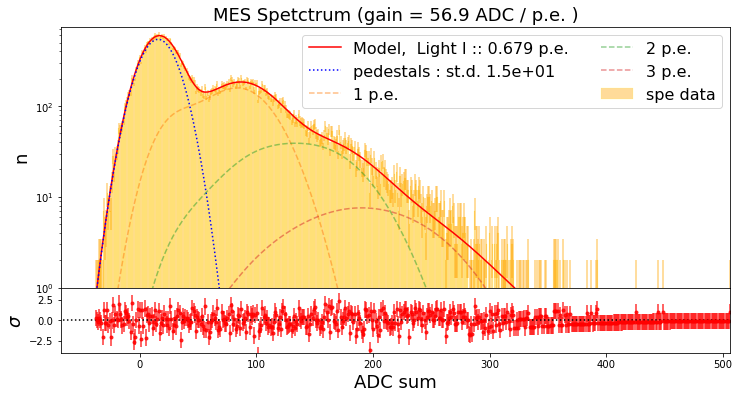

In [9]:
res_data,err,gain_data = fit_ses_2g_2(Q_array1_data,plot=True)

=== Gain ::  62.07685377266081 p.e. ------------- ==== Light I 1.4025742484848172


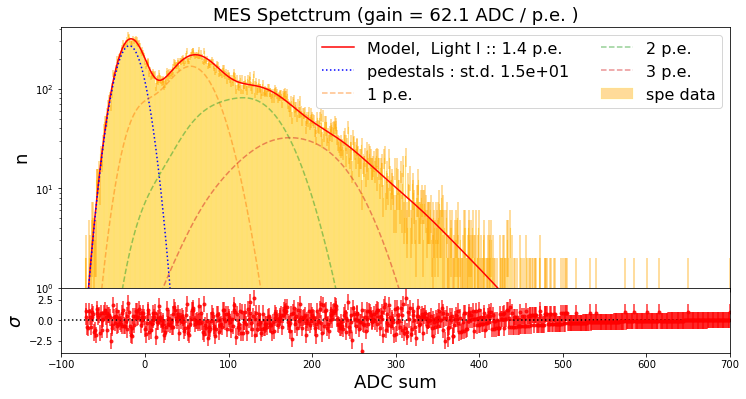

In [48]:
res_data,err,gain_data = fit_ses_2g_2(Q_array1_MC,plot=True)

In [11]:
ress_MC    = np.array(ress_MC)
ress_data  = np.array(ress_data)
gains_MC   = np.array(gains_MC)
gains_data = np.array(gains_data)

sim_gains = np.array(sim_gains)

In [12]:
ress_data.mean(axis=0)

array([6.50912670e-01, 3.98958135e+03, 1.44303040e+01, 4.98273502e-01,
       7.00588125e+01])

Text(0.5, 0, 'ADC sum')

/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


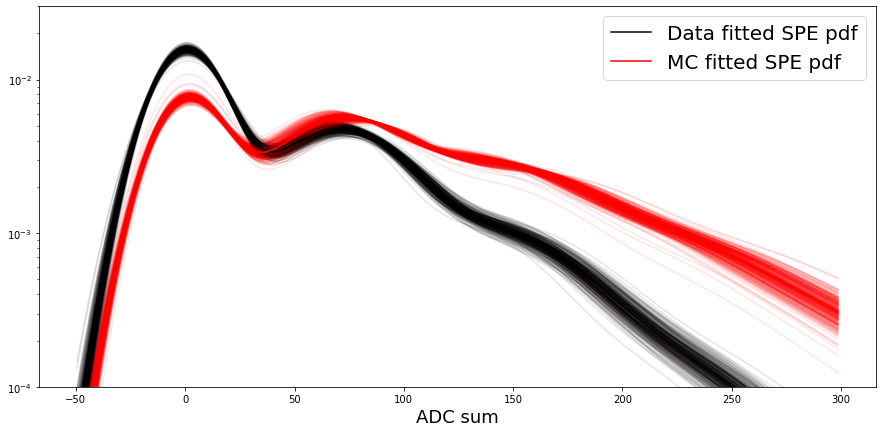

In [13]:
bins = np.arange(-50,300,1)
xx = (bins[1:]+bins[:-1])/2
#h = plt.hist(Q_array1_MC-res_MC[1],  bins=bins,color='red',    alpha=.3, density=1,label='MC')
##h = plt.hist(Q_array1_data-res_data[1],bins=bins,color='black',alpha=.3, density=1,label='data')


for ii in range(len(ress_data)):
    
    p = plt.plot(xx,mes2g(xx,ress_data[ii,0],0,ress_data[ii,2],ress_data[ii,3],ress_data[ii,4]),color='black',alpha=.1)
    p = plt.plot(xx,mes2g(xx,ress_MC[ii,0],0,ress_MC[ii,2],ress_MC[ii,3],ress_MC[ii,4]),color='red',alpha=.1)

p = plt.plot(xx,mes2g(xx,ress_data[:,0].mean(axis=0), \
                          0,ress_data[:,2].mean(axis=0), \
                          ress_data[:,3].mean(axis=0), \
                          ress_data[:,4].mean(axis=0)),color='black',alpha=1,\
                          label='Data fitted SPE pdf')
p = plt.plot(xx,mes2g(xx,ress_MC[:,0].mean(axis=0), \
                          0,ress_MC[:,2].mean(axis=0), \
                          ress_MC[:,3].mean(axis=0), \
                          ress_MC[:,4].mean(axis=0)),color='red',alpha=1,\
                          label='MC fitted SPE pdf')

ax = plt.gca()
ax.set_ylim(1e-4,3e-2)
ax.set_yscale('log')
ax.legend(prop={'size':20})
ax.set_xlabel('ADC sum',fontsize=18)

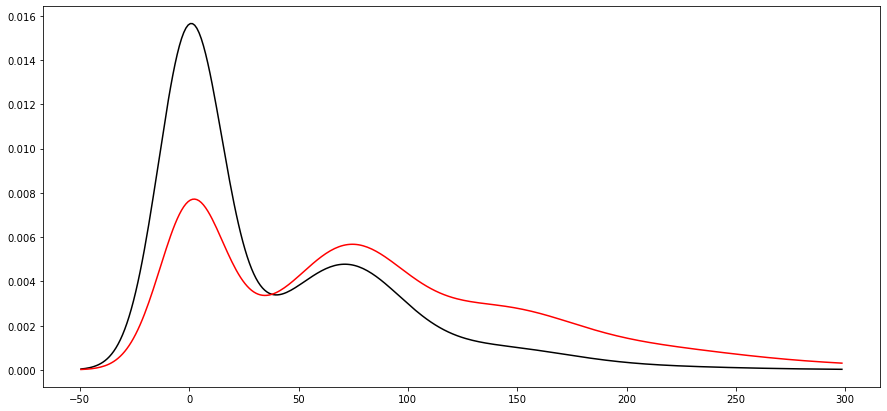

In [14]:
p = plt.plot(xx,mes2g(xx,ress_data[:,0].mean(axis=0), \
                          0,ress_data[:,2].mean(axis=0), \
                          ress_data[:,3].mean(axis=0), \
                          ress_data[:,4].mean(axis=0)),color='black',alpha=1,\
                          label='Data fitted SPE pdf')
p = plt.plot(xx,mes2g(xx,ress_MC[:,0].mean(axis=0), \
                          0,ress_MC[:,2].mean(axis=0), \
                          ress_MC[:,3].mean(axis=0), \
                          ress_MC[:,4].mean(axis=0)),color='red',alpha=1,\
                          label='MC fitted SPE pdf')

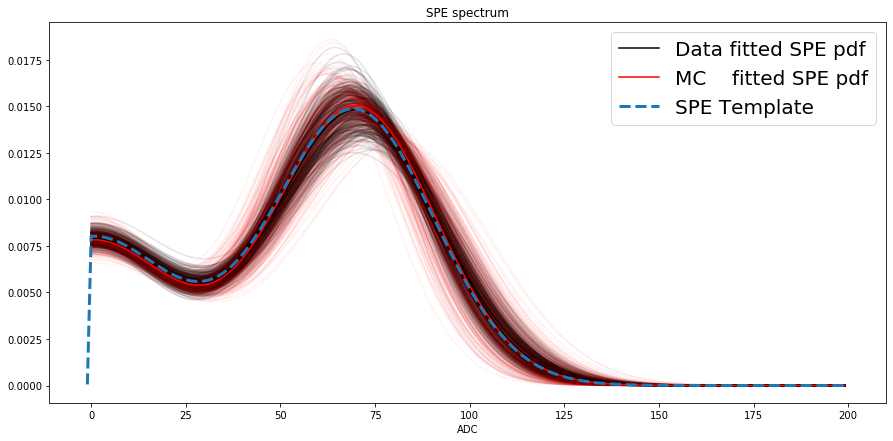

In [40]:

    
#fff ='/local/home/ttaverni/cta-nectar/NectarCamPyUaf/cta/MyNectar/scripts/Nectarpipe_2.0/spe_afterpulse_pdf_NectarCam_14032019.dat'
#from astropy.io import ascii
#aaa = ascii.read(fff)
#plt.plot(aaa['col1'][:300]*58.,aaa['col3'][:300]/58.)

xxx = np.linspace(-1,200,202)
x2 = np.linspace(-1,200,202)

##Fixed param(old)
pp  = 0.45
nn  = 0.715
mu2 = 69.4
res = 0.48
#new
pp  = 0.39
nn  = 0.71
mu2 = 69.4
res = 0.50

xxx = np.arange(0,200,1)
for ii in range(len(ress_data)):
    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[ii,3],ress_data[ii,4],nn),color='black',alpha=.1)
    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[ii,3],ress_MC[ii,4],nn),color='red',alpha=.05)



p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[:,3].mean(axis=0),ress_data[:,4].mean(axis=0),nn),color='black',alpha=1,\
             label='Data fitted SPE pdf')
p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[:,3].mean(axis=0),ress_MC[:,4].mean(axis=0),nn),color='red',alpha=1,\
            label='MC    fitted SPE pdf')

spe = doubleGaussConstrained(x2,pp,res,mu2,nn)
plt.plot(x2,spe,'--',lw=3.,label='SPE Template')
gain = np.sum(x2*doubleGaussConstrained(x2,pp,res,mu2,nn))
plt.gca().set_title('SPE spectrum')
plt.gca().set_xlabel('ADC')
plt.gca().legend(prop={'size': 20})

0.05273602719625544

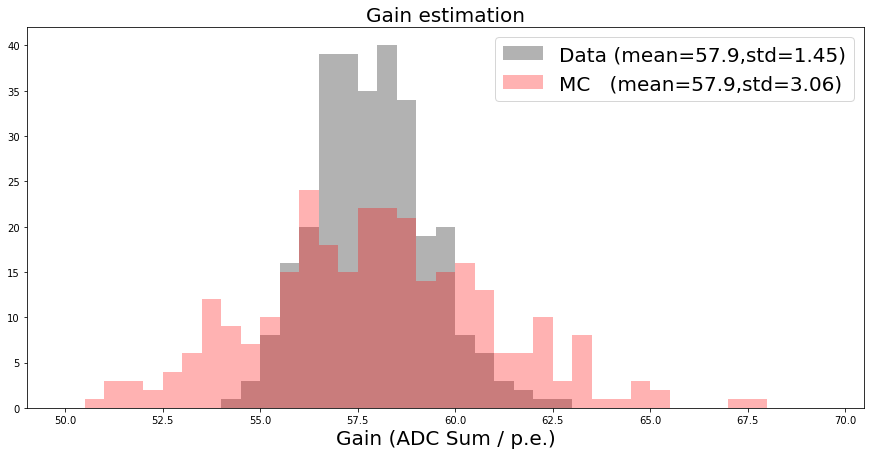

In [49]:
plt.hist(gains_data,bins=np.arange(50,70,.5),color='black',alpha=.3,\
         label='Data (mean={:.3},std={:.3})'.format(gains_data.mean(),gains_data.std()))
plt.hist(gains_MC,bins=np.arange(50,70,.5),color='red',alpha=.3,\
         label='MC   (mean={:.3},std={:.3})'.format(gains_MC.mean(),gains_MC.std()))
plt.gca().legend(prop={'size':20})

plt.gca().set_title('Gain estimation',fontsize=20)

plt.gca().set_xlabel('Gain (ADC Sum / p.e.)',fontsize=20)
gains_MC.std()/gains_MC.mean()

In [17]:
gains_data.argmin()


266

In [18]:
dc_to_pe

array([0.01884327, 0.01932213, 0.02022455, 0.01984112, 0.01896794,
       0.01907797, 0.01956903, 0.01732786, 0.01898584, 0.01868628],
      dtype=float32)

In [19]:
58.*dc_to_pe.mean()

1.106906734406948

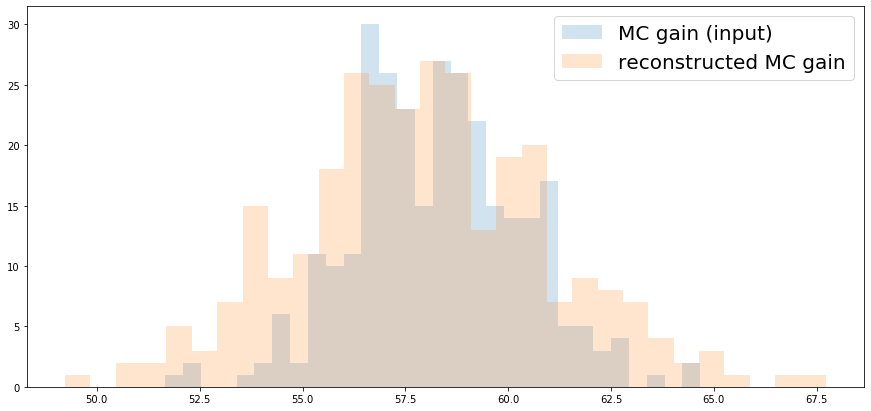

In [38]:
h=plt.hist(sim_gains,30,alpha=.2,label='MC gain (input)')
h=plt.hist(gains_MC,30,alpha=.2,label='reconstructed MC gain')
plt.gca().legend(prop={'size':20})

0.08245686806412449


Text(0.5, 1.0, 'Fitted Gain / simulated Gain')

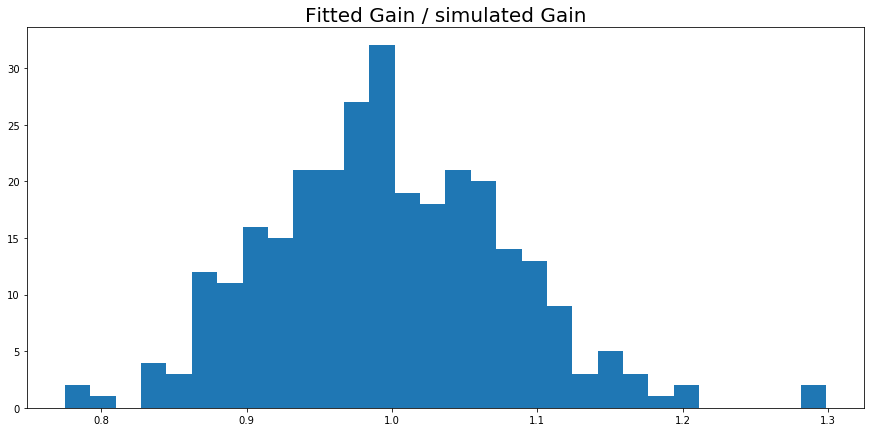

In [21]:
h=plt.hist(gains_MC/sim_gains,30)


print((gains_MC/sim_gains).std())
           
plt.gca().set_title("Fitted Gain / simulated Gain",fontsize=20)

In [22]:
(gains_MC/sim_gains).mean()

0.9966291324543309

In [23]:
(gains_MC/sim_gains).std()

0.08245686806412449

In [24]:
(gains_data/gains_data.mean()).std()

0.025058950796415142

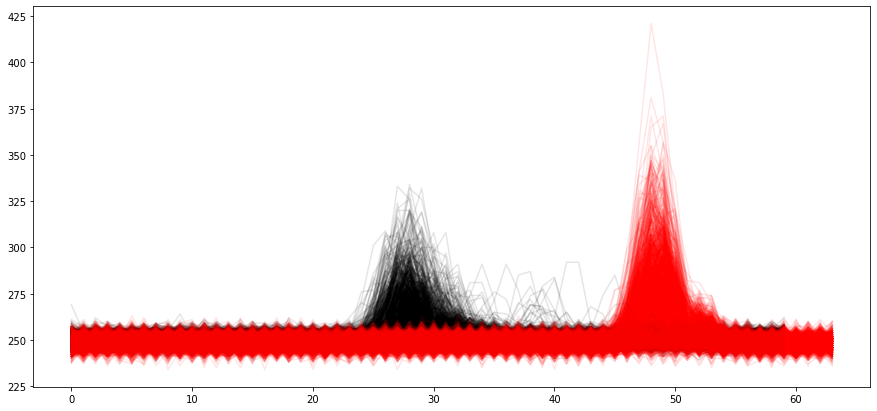

In [25]:
p = plt.plot(wfs_data[:2000,1,:].T,color = 'black',alpha=.1)
p = plt.plot(wfs_MC[:2000,1,:].T,color = 'red',alpha=.1)

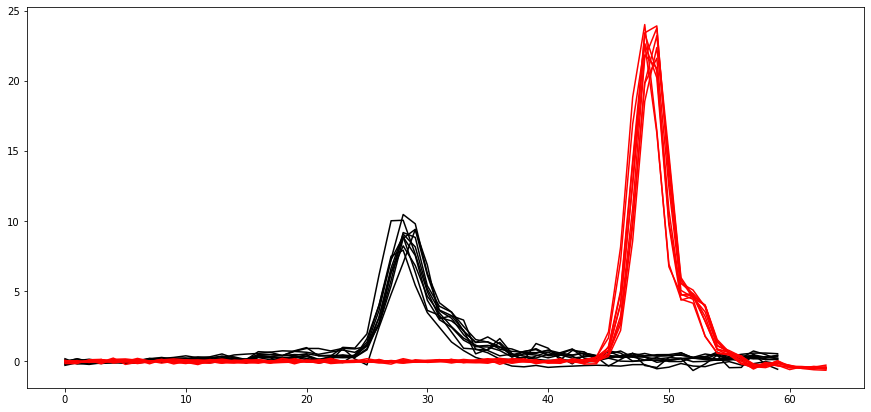

In [26]:
p = plt.plot(wfs_data[:2000,:,:].mean(axis=0).T-wfs_data[:2000,:,:10].mean(axis=(0,2)),color = 'black',alpha=1)
p = plt.plot(wfs_MC[:2000,:,:].mean(axis=0).T-wfs_MC[:2000,:,:10].mean(axis=(0,2)),color = 'red',alpha=1)

Text(0.5, 0, 'Light intensity (p.e.)')

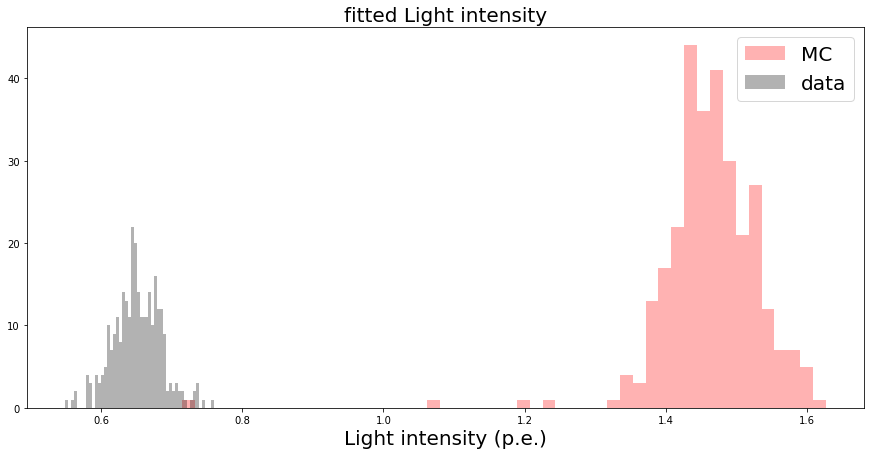

In [27]:
plt.hist(ress_MC.T[0],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[0],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted Light intensity',fontsize=20)
plt.gca().set_xlabel('Light intensity (p.e.)',fontsize=20)

Text(0.5, 0, 'ADC')

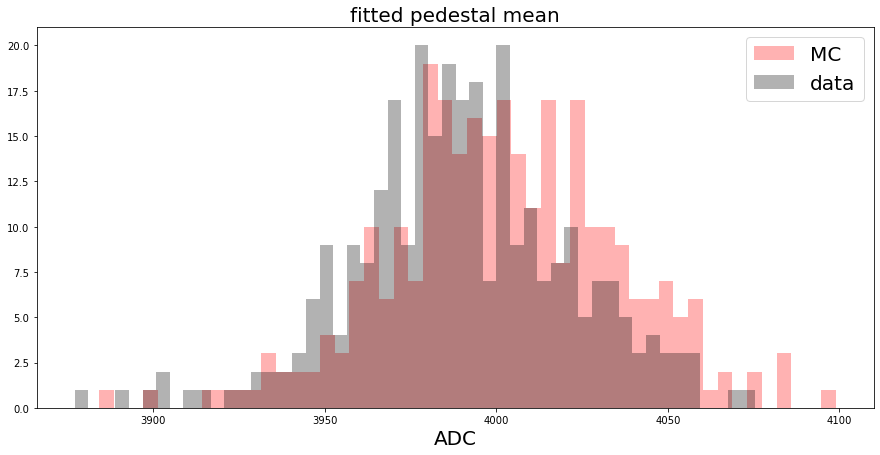

In [28]:
plt.hist(ress_MC.T[1],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[1],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted pedestal mean',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

Text(0.5, 0, 'ADC')

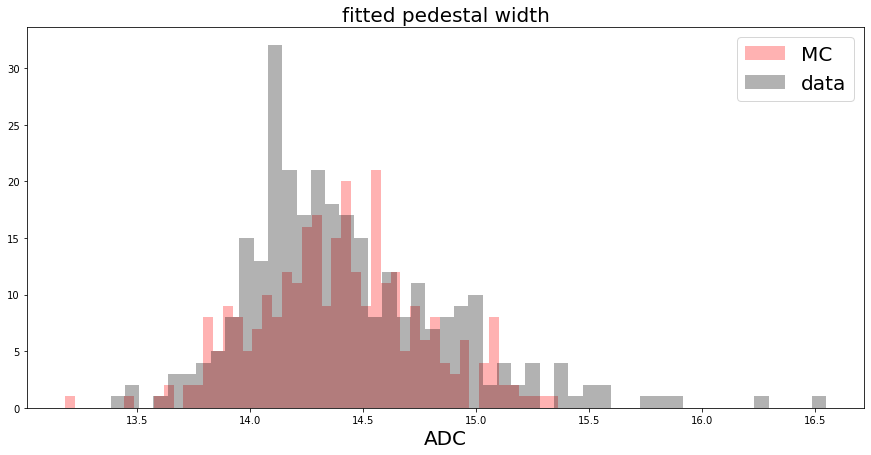

In [29]:
plt.hist(ress_MC.T[2],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[2],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted pedestal width',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

Text(0.5, 0, 'ADC')

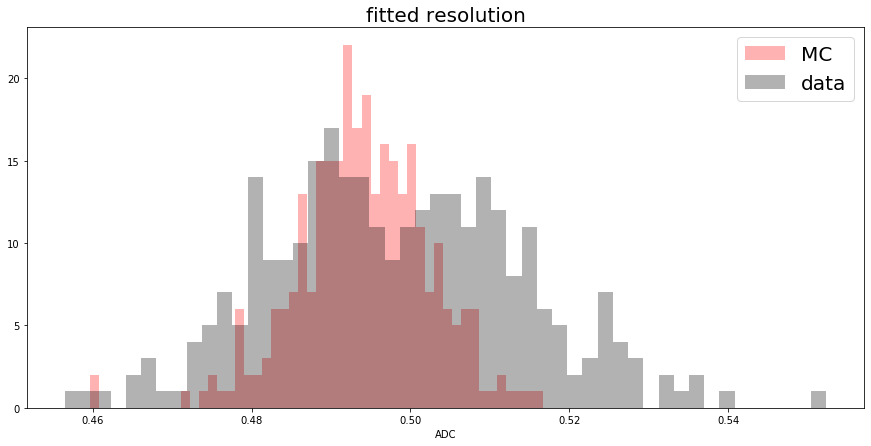

In [30]:
plt.hist(ress_MC.T[3],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[3],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted resolution',fontsize=20)
plt.gca().set_xlabel('ADC')

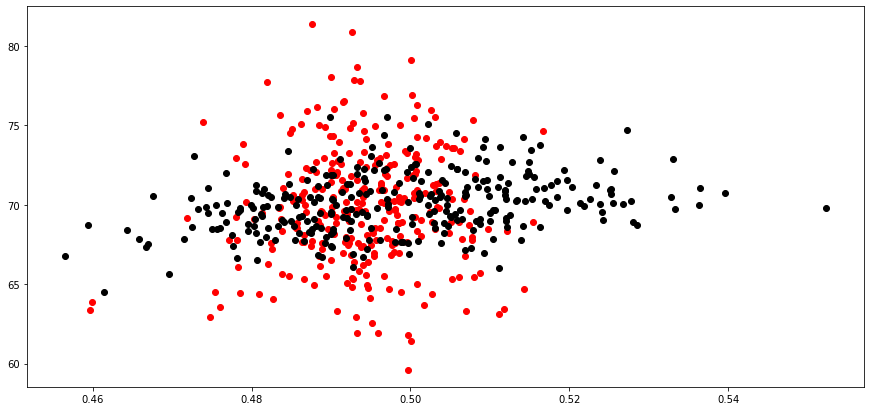

In [31]:
plt.plot(ress_MC.T[3],ress_MC.T[4],'o',color='red')
plt.plot(ress_data.T[3],ress_data.T[4],'o',color='black')

Text(0.5, 0, 'ADC')

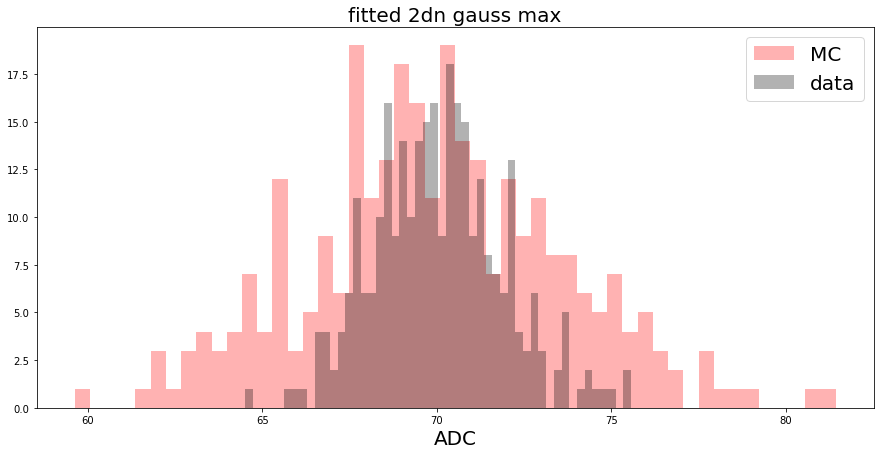

In [32]:
plt.hist(ress_MC.T[4],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[4],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted 2dn gauss max',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

Text(0.5, 0, 'ADC')

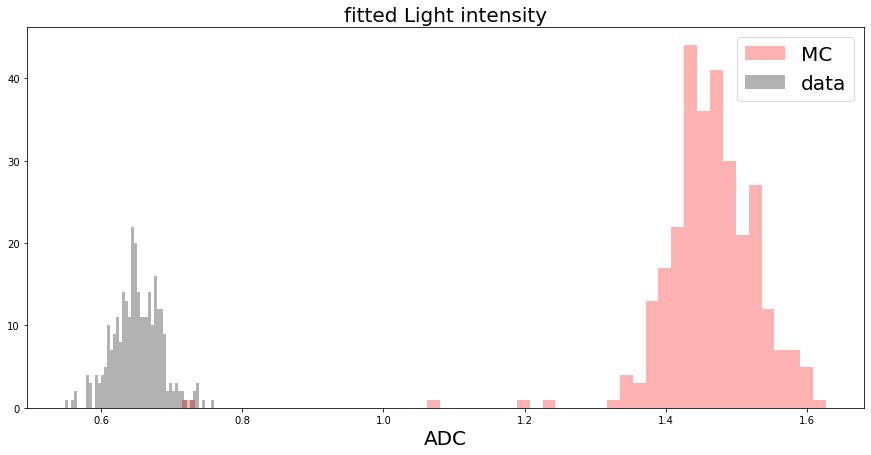

In [33]:
plt.hist(ress_MC.T[0],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[0],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted Light intensity',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

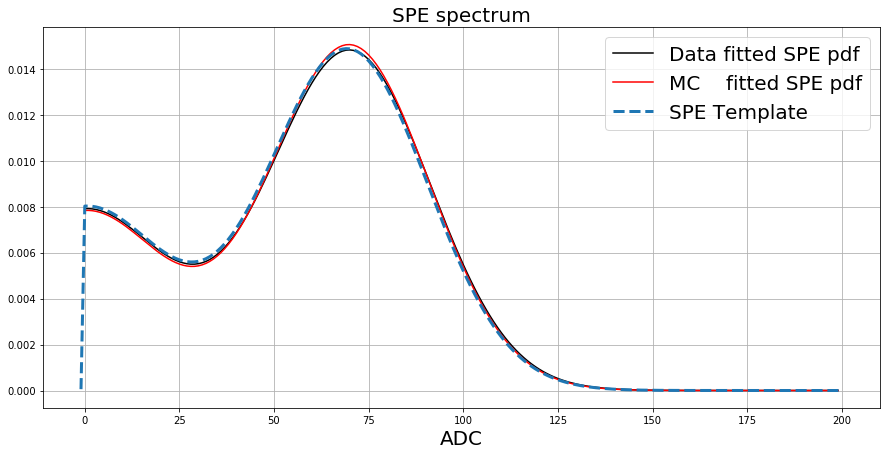

In [41]:

    
#fff ='/local/home/ttaverni/cta-nectar/NectarCamPyUaf/cta/MyNectar/scripts/Nectarpipe_2.0/spe_afterpulse_pdf_NectarCam_14032019.dat'
#from astropy.io import ascii
#aaa = ascii.read(fff)
#plt.plot(aaa['col1'][:300]*58.,aaa['col3'][:300]/58.)

xxx = np.linspace(-1,200,202)
x2 = np.linspace(-1,200,202)

##Fixed param
pp  = 0.45
nn  = 0.715
mu2 = 69.4
res = 0.48

#new
pp  = 0.39
nn  = 0.71
mu2 = 69.4
res = 0.50


xxx = np.arange(0,200,1)
#for ii in range(len(ress_data)):
#    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[ii,3],ress_data[ii,4],nn),color='black',alpha=.1)
#    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[ii,3],ress_MC[ii,4],nn),color='red',alpha=.05)



p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[:,3].mean(axis=0),ress_data[:,4].mean(axis=0),nn),color='black',alpha=1,\
             label='Data fitted SPE pdf')
p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[:,3].mean(axis=0),ress_MC[:,4].mean(axis=0),nn),color='red',alpha=1,\
            label='MC    fitted SPE pdf')

spe = doubleGaussConstrained(x2,pp,res,mu2,nn)

plt.plot(x2,spe,'--',lw=3.,label='SPE Template')
gain = np.sum(x2*doubleGaussConstrained(x2,pp,res,mu2,nn))
plt.gca().set_title('SPE spectrum',fontsize=20.)
plt.gca().set_xlabel('ADC',fontsize=20.)
plt.gca().legend(prop={'size': 20})
plt.gca().grid()

In [35]:
ress_data[:,:].mean(axis=0)

array([6.50912670e-01, 3.98958135e+03, 1.44303040e+01, 4.98273502e-01,
       7.00588125e+01])

In [36]:
ress_MC[:,:].mean(axis=0)

array([1.46254271e+00, 4.00191382e+03, 1.43967430e+01, 4.94044653e-01,
       6.99285774e+01])